<a href="https://colab.research.google.com/github/GeorgeThan414/Machine_Learning_CSD/blob/main/Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [2]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Task 1 -Load Mnist & Print the shapes of the data


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Train set shape :", x_train.shape)
print("Test set shape  :", x_test.shape)
print("Train labels    :", y_train.shape)
print("Test labels     :", y_test.shape)


Train set shape : (60000, 28, 28)
Test set shape  : (10000, 28, 28)
Train labels    : (60000,)
Test labels     : (10000,)


# Task2- Visuliaze each digit from the train_dataset.

We have to select randomly all the distinct digits from the dataset and visualize them.


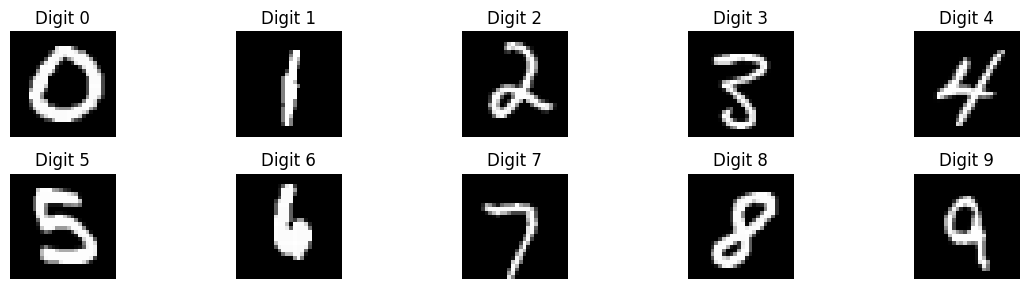

In [5]:
# Create a dictionary of indices for each digit
# Its storing inside the dictionary all the indices from tain_dataset.
# Its not very producing, because it requires time to complete this process.
# But to visualize each time randomly all the digits from 0-9 its necessary.
digits_indices = {d: np.where(y_train == d)[0] for d in range(10)}

# Sample one random image from each digit
samples = {}
for digit in range(10):
    idx = np.random.choice(digits_indices[digit])
    samples[digit] = x_train[idx]

# Plot the samples
plt.figure(figsize=(12, 3))
for digit in range(10):
    plt.subplot(2, 5, digit + 1)
    plt.imshow(samples[digit], cmap='gray')
    plt.title(f"Digit {digit}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Task 3 Size of the image

The size of each image in Binary Mnist is [1,28,28]. The first dimension refers to input channels (Binary only Black and white), the second and third are the width and length of the image.

The most important pixels in the dataset are the ones with the highest brightness=1, because these pixels contain all the information needed to identify each digit in the dataset.

# Task - 4 Convert the images to vectors.

There are several methods and functions to reshape the images-matrices to vectors, such as view,reshape, flatten() etc.

In addition, the values in the vectors are in original scale, because we didnt apply any normalization technique yet.

In [6]:
# Flatten all training images
# Below commands loop through the entire MNIST dataset,
  # Each iteration returns the flattened image 28x28=784 and stack them in one vector.
  # Each row is corresponding to one tensor image

N = x_train.shape[0]
X_train_vector = x_train.reshape(N,-1)
X_test_vector = x_test.reshape(x_test.shape[0],-1)

print(f"The shape of the X train Vector is:, {X_train_vector.shape}")
print(f"The shape of the X test Vector is:, {X_test_vector.shape}")

The shape of the X train Vector is:, (60000, 784)
The shape of the X test Vector is:, (10000, 784)


# Task 5 - Train the KNN with different k
The length of the dataset is very large, so the application of the  KNN algorithm which tries to find the distances between the training data with the testing data, will not be instantly. Even the algorithms such as KD-tree and Ball Tree will take long to be completed. Their time complexity is O(N*LogN), in our case the N = 60000 in fitting (training) loop, which will affect the required computation time to be finalized and outputs the classification results. In the prediction time, the computational cost and time will be less, because the test set is much smaller than the train set.

 Knn with k: 5
Fit time: 0 hr 0 min 0.02 sec
Inference time: 0 hr 0 min 51.71 sec
 Knn with k: 15
Fit time: 0 hr 0 min 0.01 sec
Inference time: 0 hr 0 min 50.78 sec
 Knn with k: 51
Fit time: 0 hr 0 min 0.01 sec
Inference time: 0 hr 0 min 51.52 sec
 Knn with k: 244
Fit time: 0 hr 0 min 0.01 sec
Inference time: 0 hr 0 min 51.52 sec


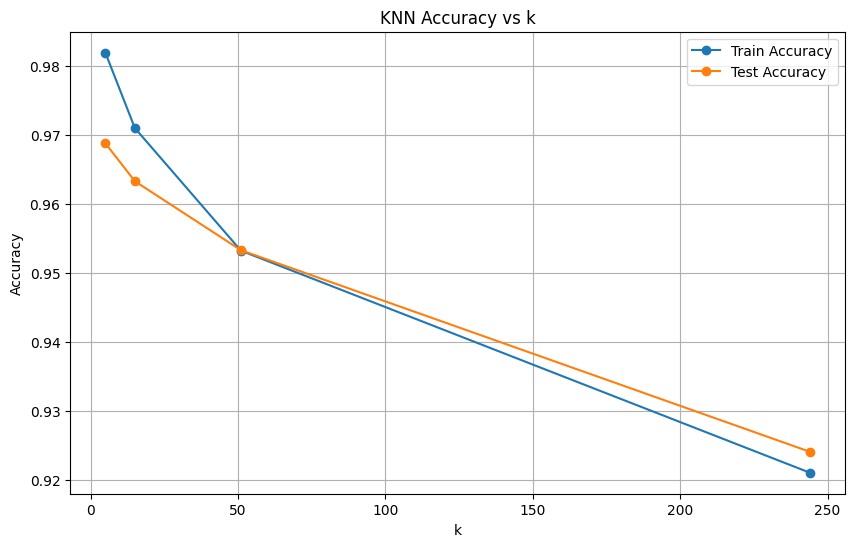

In [7]:
# Define the different k
k_values=[5,15,51,int(np.sqrt(N))]

# Initialize the train_accuracy, test_accuracy lists, to store the accuracy for each experiment.
train_accuracy=[]
test_accuracy=[]

for k in k_values:
  # fit each knn algorithm to the train data
  # n_jobs =-1 uses all the cpu cores, to make faster the process of the algorithm
  print(f" Knn with k: {k}")
  knn=KNeighborsClassifier(n_neighbors=k, algorithm='auto', metric='euclidean', n_jobs=-1)

  # Measure the time of fitting the algorithm to the data
  # Knn is lazy algorithm, fitting is typical the term, which the algorithm is applied to the train data, is not learning anything or actually training.
  t0=time.time()
  knn.fit(X_train_vector, y_train)
  fit_time = time.time() - t0
  h = int(fit_time // 3600)
  m = int((fit_time % 3600) // 60)
  s = fit_time % 60
  print(f"Fit time: {h} hr {m} min {s:.2f} sec")

  # Store the accuracy for both train, test sets
  y_train_pred=knn.predict(X_train_vector)
  train_accuracy.append(accuracy_score(y_train,y_train_pred))

  # Actually the fitting time will take less than the inference.
  # Becasue the algorithm have to calculate the distances of all the 10000 test samples with the training samples in 784 dimensions.
  t1 = time.time()
  y_test_pred=knn.predict(X_test_vector)
  inference_time = time.time() - t1
  h = int(inference_time // 3600)
  m = int((inference_time % 3600) // 60)
  s = inference_time % 60
  print(f"Inference time: {h} hr {m} min {s:.2f} sec")
  test_accuracy.append(accuracy_score(y_test,y_test_pred))

#Plot the accuracy scores for each experiment
plt.figure(figsize=(10,6))
plt.plot(k_values, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(k_values, test_accuracy, marker='o', label='Test Accuracy')

plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs k")
plt.grid(True)
plt.legend()
plt.show()


# Task 6 - Normalization & Repeat task 5

In order to classify the digits more accurate, it would be wise to normalize the inputs, because KNN is very sensitive to large numbers.

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

# Fit the scaler only to data
X_train_vector_scaled=scaler.fit_transform(X_train_vector)

# Only Transform the X_test
X_test_vector_scaled=scaler.transform(X_test_vector)


 Knn with k: 5
Fit time: 0 hr 0 min 0.08 sec
Time needed in training set to predict: 0 hr 0 min 41.58 sec
Inference time: 0 hr 0 min 40.22 sec
 Knn with k: 15
Fit time: 0 hr 0 min 0.04 sec
Time needed in training set to predict: 0 hr 0 min 40.22 sec
Inference time: 0 hr 0 min 40.05 sec
 Knn with k: 51
Fit time: 0 hr 0 min 0.05 sec
Time needed in training set to predict: 0 hr 0 min 40.05 sec
Inference time: 0 hr 0 min 40.18 sec
 Knn with k: 244
Fit time: 0 hr 0 min 0.04 sec
Time needed in training set to predict: 0 hr 0 min 40.18 sec
Inference time: 0 hr 0 min 43.03 sec


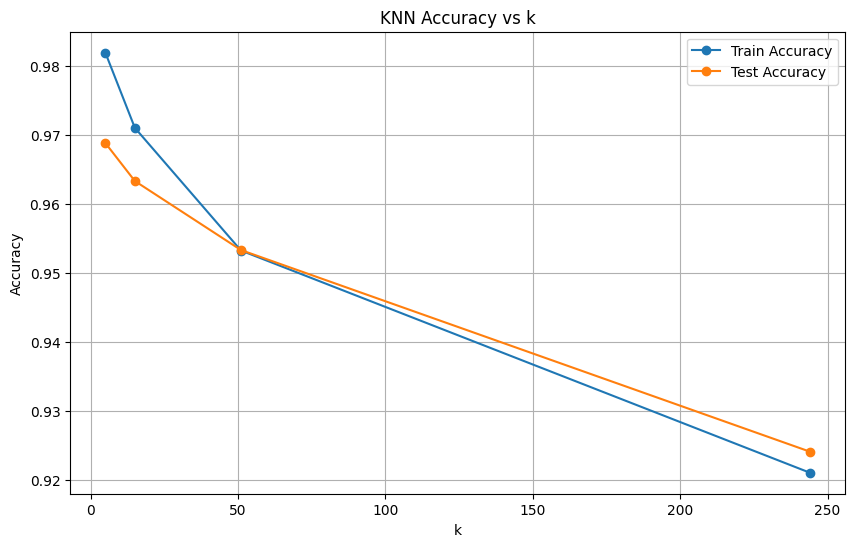

In [39]:
# Define the different k
k_values=[5,15,51,int(np.sqrt(N))]
best_knn = None
best_k = None
best_test_accuracy = -1

# Initialize the train_accuracy, test_accuracy lists, to store the accuracy for each experiment.
train_accuracy=[]
test_accuracy=[]

for k in k_values:
  # fit each knn algorithm to the train data
  # n_jobs =-1 uses all the cpu cores, to make faster the process of the algorithm
  print(f" Knn with k: {k}")
  knn=KNeighborsClassifier(n_neighbors=k, algorithm='auto', metric='euclidean', n_jobs=-1)

  # Measure the time of fitting the algorithm to the data
  # Knn is lazy algorithm, fitting is typical the term, which the algorithm is applied to the train data, is not learning anything or actually training.
  t0=time.time()
  knn.fit(X_train_vector_scaled, y_train)
  fit_time = time.time() - t0
  h = int(fit_time // 3600)
  m = int((fit_time % 3600) // 60)
  s = fit_time % 60
  print(f"Fit time: {h} hr {m} min {s:.2f} sec")

  # Store the accuracy for both train, test sets
  t1 = time.time()
  y_train_pred_scaled=knn.predict(X_train_vector_scaled)
  inference_train_time = time.time() - t1
  h = int(inference_time // 3600)
  m = int((inference_time % 3600) // 60)
  s = inference_time % 60
  print(f"Time needed in training set to predict: {h} hr {m} min {s:.2f} sec")
  train_accuracy.append(accuracy_score(y_train,y_train_pred_scaled))

  # Actually the fitting time will take less than the inference.
  # Becasue the algorithm have to calculate the distances of all the 10000 test samples with the training samples in 784 dimensions.
  t2 = time.time()
  y_test_pred_scaled=knn.predict(X_test_vector_scaled)
  inference_time = time.time() - t2
  h = int(inference_time // 3600)
  m = int((inference_time % 3600) // 60)
  s = inference_time % 60
  print(f"Inference time: {h} hr {m} min {s:.2f} sec")
  test_acc = accuracy_score(y_test, y_test_pred_scaled)
  test_accuracy.append(test_acc)

  #Store only the best version of knn with different k
  if test_acc > best_test_accuracy:
    best_test_accuracy= test_acc
    best_k=k
    best_knn=knn

#Plot the accuracy scores for each experiment
plt.figure(figsize=(10,6))
plt.plot(k_values, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(k_values, test_accuracy, marker='o', label='Test Accuracy')

plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs k")
plt.grid(True)
plt.legend()
plt.show()


It is notable, from the above time results, that even a simple normalization which changes the range of data from original scale to [0,1] , have significant effect to time consumption specifically in KNN algorithm.



As for the results between task 5 and task 6, both accuracy metrics look identintical, and there are many reasons for this occurrence.

1) The dataset consist of Binary images, so the values have two values either 1 or 0. Even after the application of normilization the values will have again two distinct values, so normilzation doesnt change the original/nature scale from data.

2) It is logical, that Normalization doesnt change KNN decisions, it just applies a new term (1/255) to pixel brightness, and also to distance calculation. Is like multiples each distance with (1/255), still the decision of the classification task is the same.

Eventually, normalization has major effect when features have different scales, when datasets consists of mixed features (age,salary,two ,etc.).


# Task 7 - Upload Hardwritten Mnist digit - Take Predictions

# Import Image to open the png.

In [40]:
from PIL import Image

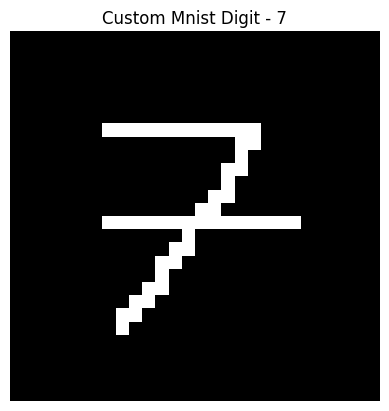

In [41]:
filename= "/content/mnist_digit_7.png"

# Load the image
# Convert it to grayscale and to numpy array
img=Image.open(filename).convert("L")
imt= img.resize((28,28))
img_array=np.array(img)
plt.imshow(img_array, cmap="gray")
plt.title("Custom Mnist Digit - 7")
plt.axis("off")
plt.show()


# Reshape and use the KNN to predict it.

In [42]:
img_vector= img_array.reshape(1,-1)
img_vector_scaled = scaler.transform(img_vector)
prediction = knn.predict(img_vector)
print("Predicted digit:", prediction[0])

Predicted digit: 8


First of all, to classify my digit i used the best knn algorithm which is the one with k= 5. The hardwritten digit is a 7. The model predicts is as 8, even after normalization. Actually, even the best model which achieved the highest accuracy score has almost 97% accuracy in the test set. So the percentage not to predict correctly the digit is around 3%.

One main reason that the knn classifier, didnt predict corect my digit, is that the difference between the distribution of actual 7 digits from the dataset with mine. Moreover, another reason that explains this mis-classification is the noise that may i inserted to the drawing. Additionally another reason is that, this algorithm is very sensitive to pixel-level changes, it doesnt extracts any features from the data samples, with a result that even small changes to different neighbors-pixel brightness have affect to a distribution shift, and affect to the calculation of euclidean distances.

